In [1]:
import sys, os
from pathlib import Path


ROOT = Path.cwd()
if ROOT.name.lower() == "notebooks":   
    ROOT = ROOT.parent

sys.path.insert(0, str(ROOT))
print("Project root on sys.path:", ROOT)

Project root on sys.path: C:\Users\saita\Yahoo Stock Forecasting


In [2]:
# --- Standard imports ---
import numpy as np
import pandas as pd

# --- Project imports from src package ---
from src.config import DATA_PATH, TARGET_COL, DATE_COL
from src.data_utils import load_raw_data, train_val_test_split_time
from src.models_arima import train_arima, forecast_arima, save_arima_model
from src.metrics import rmse, mae, mape, r2

In [3]:
df = load_raw_data(DATA_PATH)
# Time-based train/val/test split
train_df, val_df, test_df = train_val_test_split_time(df)
len(train_df), len(val_df), len(test_df)

(1277, 273, 275)

In [4]:
train_val_df = pd.concat([train_df, val_df]).reset_index(drop=True)
arima_model = train_arima(
    train_val_df,
    seasonal=False, 
    m=1,
    trace=True      
)

print("Chosen ARIMA order:", arima_model.order)
print("Chosen seasonal order:", getattr(arima_model, "seasonal_order_", "N/A"))

# Save model
model_path = save_arima_model(arima_model)
print("Saved ARIMA model to:", model_path)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=13214.983, Time=0.66 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=13220.342, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=13218.711, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=13218.727, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=13222.006, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=13217.279, Time=0.46 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=13222.711, Time=0.27 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=13216.361, Time=0.92 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=13216.311, Time=1.24 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=13220.709, Time=0.20 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=13215.273, Time=0.52 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=13215.668, Time=0.58 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=13214.821, Time=1.44 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=13218.528, Time=1.47 sec
 ARIMA(3,1,4)(0,0,0

In [5]:
n_test = len(test_df)
y_pred = forecast_arima(arima_model, n_periods=n_test)

y_true = test_df[TARGET_COL].values

print("ARIMA (auto_arima) Test RMSE:", rmse(y_true, y_pred))
print("ARIMA (auto_arima) Test MAE :", mae(y_true, y_pred))
print("ARIMA (auto_arima) Test MAPE:", mape(y_true, y_pred))
print("ARIMA (auto_arima) Test R2:", r2(y_true, y_pred))

ARIMA (auto_arima) Test RMSE: 444.4470863303823
ARIMA (auto_arima) Test MAE : 365.5393260454329
ARIMA (auto_arima) Test MAPE: 12.650582977493771
ARIMA (auto_arima) Test R2: -1.1127382539516022


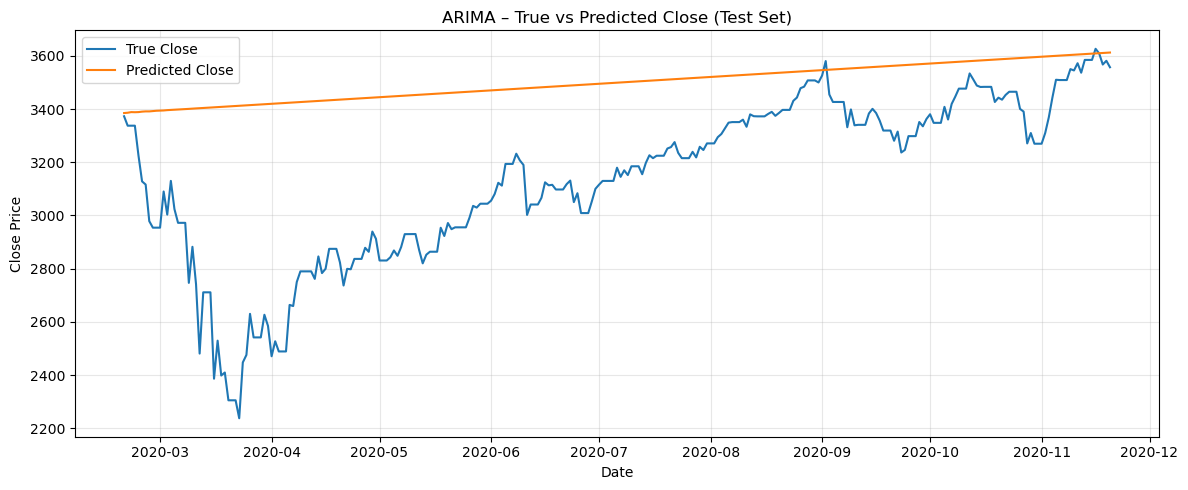

In [6]:
import matplotlib.pyplot as plt

dates = test_df[DATE_COL].values  

plt.figure(figsize=(12, 5))
plt.plot(dates, y_true, label="True Close", linewidth=1.5)
plt.plot(dates, y_pred, label="Predicted Close", linewidth=1.5)
plt.title("ARIMA – True vs Predicted Close (Test Set)")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()